# Importing the Libraries 
<br />
<br />
<br />
<br />

In [295]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [324]:
df= pd.read_csv(r'/Users/alix/Desktop/encoded_data4.csv')

# EXPLORATORY DATA ANALYSIS AND CORRELATION 
<br />
<br />
<br />
<br />

In [325]:
# let's first visualize the columns 
for i,c in enumerate(df.columns):
    print(i,c)

0 Unnamed: 0
1 Age
2 Gender
3 Weight
4 Height
5 Level
6 Indoor or outdoor
7 Experience
8 Training frequency
9 Gym
10 Competition
11 BMI
12 Start_Age
13 barrabes
14 boldrini
15 boreal
16 decathlon
17 eb
18 edmond 
19 evolv phantom
20 five ten
21 five ten 
22 garre
23 la sportiva
24 mad rock
25 millet
26 red chili
27 rental shoes
28 scarpa
29 scarpa and la sportiva
30 scarpa drago lv , scarpa instinct vs, tenaya oasi 
31 simond
32 so ill free range pro
33 suesca
34 tenaya
35 vapor
36 xsgrip


In [326]:
df

,Unnamed: 0,Age,Gender,Weight,Height,Level,Indoor or outdoor,Experience,Training frequency,Gym,...,rental shoes,scarpa,scarpa and la sportiva,"scarpa drago lv , scarpa instinct vs, tenaya oasi",simond,so ill free range pro,suesca,tenaya,vapor,xsgrip
0,0,40,1,78,181,0.0,1,1.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,32,1,65,180,0.0,0,6.0,3,1,...,0,0,0,0,0,0,0,0,0,0
2,2,40,1,105,186,0.0,0,1.0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,32,1,46,155,1.0,0,1.0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,4,22,1,63,178,1.0,1,1.0,4,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,105,32,1,70,172,3.0,0,3.0,2,1,...,0,0,0,0,0,0,0,0,0,0
106,106,33,1,64,178,6.0,0,7.0,3,0,...,0,0,0,0,0,0,0,0,0,0
107,107,36,0,62,169,6.0,0,1.0,1,1,...,0,0,0,0,0,0,0,0,0,0
108,108,23,0,56,159,2.0,1,2.0,4,1,...,0,0,1,0,0,0,0,0,0,0


In [327]:
df= df.drop(['Unnamed: 0'], axis=1)
df

,Age,Gender,Weight,Height,Level,Indoor or outdoor,Experience,Training frequency,Gym,Competition,...,rental shoes,scarpa,scarpa and la sportiva,"scarpa drago lv , scarpa instinct vs, tenaya oasi",simond,so ill free range pro,suesca,tenaya,vapor,xsgrip
0,40,1,78,181,0.0,1,1.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,32,1,65,180,0.0,0,6.0,3,1,1,...,0,0,0,0,0,0,0,0,0,0
2,40,1,105,186,0.0,0,1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,32,1,46,155,1.0,0,1.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,22,1,63,178,1.0,1,1.0,4,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,32,1,70,172,3.0,0,3.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
106,33,1,64,178,6.0,0,7.0,3,0,1,...,0,0,0,0,0,0,0,0,0,0
107,36,0,62,169,6.0,0,1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
108,23,0,56,159,2.0,1,2.0,4,1,1,...,0,0,1,0,0,0,0,0,0,0


In [328]:
df.columns

Index(['Age', 'Gender', 'Weight', 'Height', 'Level', 'Indoor or outdoor',
       'Experience', 'Training frequency', 'Gym', 'Competition', 'BMI',
       'Start_Age', 'barrabes', 'boldrini', 'boreal', 'decathlon', 'eb',
       'edmond ', 'evolv phantom', 'five ten', 'five ten ', 'garre',
       'la sportiva', 'mad rock', 'millet', 'red chili', 'rental shoes',
       'scarpa', 'scarpa and la sportiva',
       'scarpa drago lv , scarpa instinct vs, tenaya oasi ', 'simond',
       'so ill free range pro', 'suesca', 'tenaya', 'vapor', 'xsgrip'],
      dtype='object')

In [301]:
#df.corr()

In [322]:
pair= df[["Training frequency", "Level"]]

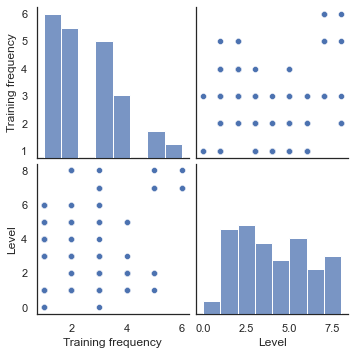

In [323]:

sns.pairplot(pair)

In [306]:
df2=df.loc[(df.BMI <= 40)&(df.BMI >= 18.5)]
df2

,Age,Gender,Weight,Height,Level,Indoor or outdoor,Experience,Training frequency,Gym,Competition,...,rental shoes,scarpa,scarpa and la sportiva,"scarpa drago lv , scarpa instinct vs, tenaya oasi",simond,so ill free range pro,suesca,tenaya,vapor,xsgrip
0,40,1,78,181,0.0,1,1.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,32,1,65,180,0.0,0,6.0,3,1,1,...,0,0,0,0,0,0,0,0,0,0
2,40,1,105,186,0.0,0,1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,32,1,46,155,1.0,0,1.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,22,1,63,178,1.0,1,1.0,4,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,32,1,70,172,3.0,0,3.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
106,33,1,64,178,6.0,0,7.0,3,0,1,...,0,0,0,0,0,0,0,0,0,0
107,36,0,62,169,6.0,0,1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
108,23,0,56,159,2.0,1,2.0,4,1,1,...,0,0,1,0,0,0,0,0,0,0


# Machine Learning Model

<br />
<br />
<br />
<br />

# Preparing my machine learning Model
 1. Splitting my data into features and Labels

For my features I am going to exclude the shoes from my machine learning model, because I got so many and the encoding doesn't really make sense. So I decided the  
'Age', 'Gender', 'Weight', 'Height', 'Level', 'Indoor or outdoor','Experience', 'Training frequency', 'Gym', 'Competition', 'BMI' will probably be enough

In [329]:
df2= df[['Age', 'Gender', 'Weight', 'Height', 'Level', 'Indoor or outdoor',
       'Experience', 'Training frequency', 'Gym', 'Competition', 'BMI']]
df2

,Age,Gender,Weight,Height,Level,Indoor or outdoor,Experience,Training frequency,Gym,Competition,BMI
0,40,1,78,181,0.0,1,1.0,1,1,1,23.808797
1,32,1,65,180,0.0,0,6.0,3,1,1,20.061728
2,40,1,105,186,0.0,0,1.0,1,1,0,30.350330
3,32,1,46,155,1.0,0,1.0,1,0,0,19.146722
4,22,1,63,178,1.0,1,1.0,4,0,1,19.883853
...,...,...,...,...,...,...,...,...,...,...,...
105,32,1,70,172,3.0,0,3.0,2,1,0,23.661439
106,33,1,64,178,6.0,0,7.0,3,0,1,20.199470
107,36,0,62,169,6.0,0,1.0,1,1,0,21.707923
108,23,0,56,159,2.0,1,2.0,4,1,1,22.151023


In [331]:
df2=df.loc[(df.BMI <= 40)&(df.BMI >= 18.5)]
df2

,Age,Gender,Weight,Height,Level,Indoor or outdoor,Experience,Training frequency,Gym,Competition,...,rental shoes,scarpa,scarpa and la sportiva,"scarpa drago lv , scarpa instinct vs, tenaya oasi",simond,so ill free range pro,suesca,tenaya,vapor,xsgrip
0,40,1,78,181,0.0,1,1.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,32,1,65,180,0.0,0,6.0,3,1,1,...,0,0,0,0,0,0,0,0,0,0
2,40,1,105,186,0.0,0,1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,32,1,46,155,1.0,0,1.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,22,1,63,178,1.0,1,1.0,4,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,32,1,70,172,3.0,0,3.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
106,33,1,64,178,6.0,0,7.0,3,0,1,...,0,0,0,0,0,0,0,0,0,0
107,36,0,62,169,6.0,0,1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
108,23,0,56,159,2.0,1,2.0,4,1,1,...,0,0,1,0,0,0,0,0,0,0


In [334]:
x= df2.drop(’['Competition'], axis=1)

In [383]:
y= df2["Competition"]


In [384]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size= 0.25)



In [385]:
#train test split
#random forest
#classification report

In [386]:
from sklearn.naive_bayes import GaussianNB
m=GaussianNB()
m.fit(x_train, y_train)
pred=m.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.23      0.37        22
           1       0.23      1.00      0.37         5

    accuracy                           0.37        27
   macro avg       0.61      0.61      0.37        27
weighted avg       0.86      0.37      0.37        27



In [387]:
clf= RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.7777777777777778

In [388]:
predictions = clf.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [389]:
predicts = predictions
compare = y.copy().reset_index(drop=True)
print("ID\tPred\tReal\tError")
for i,p in enumerate(predicts):
    print(str(i)+"\t"+str(p)+"\t"+str(compare[i])+"\t"+str(compare[i]-p))

ID	Pred	Real	Error
0	0	1	1
1	0	1	1
2	0	0	0
3	0	0	0
4	0	1	1
5	0	0	0
6	0	0	0
7	0	0	0
8	0	0	0
9	0	0	0
10	0	0	0
11	0	0	0
12	0	0	0
13	0	0	0
14	0	0	0
15	0	0	0
16	0	0	0
17	1	0	-1
18	0	0	0
19	0	0	0
20	0	0	0
21	0	0	0
22	0	0	0
23	0	1	1
24	0	1	1
25	0	1	1
26	0	1	1


In [390]:
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)


In [391]:
from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier()

In [392]:
import tpot
from tpot import TPOTClassifier’
print('tpot: %s' % tpot.__version__)
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold

tpot: 0.11.7


In [393]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = TPOTClassifier(generations=5,config_dict='TPOT light', population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1)

In [394]:
model.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7922619047619048

Generation 2 - Current best internal CV score: 0.7964285714285715

Generation 3 - Current best internal CV score: 0.8071428571428572

Generation 4 - Current best internal CV score: 0.8226190476190477

Generation 5 - Current best internal CV score: 0.8226190476190477

Best pipeline: KNeighborsClassifier(RobustScaler(input_matrix), n_neighbors=18, p=1, weights=distance)


TPOTClassifier(config_dict='TPOT light',
               cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, population_size=50, random_state=1,
               scoring='accuracy', verbosity=2)

As we can see here the model is not that great for a classification problem. So I assume that I since the data came a survey made by volunteers, some of the data might be inaccurate 

In [395]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [396]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)

In [397]:

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size= 0.25)


In [398]:
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.8518518518518519

In [399]:
predicts = predictions
compare = y.copy().reset_index(drop=True)
print("ID\tPred\tReal\tError")
for i,p in enumerate(predicts):
    print(str(i)+"\t"+str(p)+"\t"+str(compare[i])+"\t"+str(compare[i]-p))

ID	Pred	Real	Error
0	0	1	1
1	0	1	1
2	0	0	0
3	0	0	0
4	0	1	1
5	0	0	0
6	0	0	0
7	0	0	0
8	0	0	0
9	0	0	0
10	0	0	0
11	0	0	0
12	0	0	0
13	0	0	0
14	0	0	0
15	0	0	0
16	0	0	0
17	1	0	-1
18	0	0	0
19	0	0	0
20	0	0	0
21	0	0	0
22	0	0	0
23	0	1	1
24	0	1	1
25	0	1	1
26	0	1	1
